# AIFFELTHON -  [WONJIN]

- wheeze - high-pitched, Frequency range of 200 -800Hz which is maintained over about 250 milliseconds

- crackle - high-pitched, Frequency range of 100~2000Hz and duration 15msec(for coarse crackles) (최대 20ms 6을 넘지않음).

- 기타, rhonchi(low-pitched), stridor(a harsh)

위의 주파수의 기준에 근거하여 파라미터들을 조정해봄.

# Butter worth filter


In [28]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
         nyq = 0.5 * fs
         low = lowcut / nyq
         high = highcut / nyq
         sos = butter(order, [low, high], analog=False, btype='band', output='sos')
         return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
         sos = butter_bandpass(lowcut, highcut, fs, order=order)
         y = sosfilt(sos, data)
         return y

In [ ]:
# Butter worth filter 적용 전 스펙토그램 출력

# log_list = []

# for i in range(len(filename_docs)):
#   sound_sample,_ = lb.load(filename_docs[i], sr=sr)
#   mSpec=lb.feature.melspectrogram(y=sound_sample, sr=sr)
#   log_mSpec = librosa.power_to_db(mSpec, ref=np.median)
#   log_list.append(log_mSpec)

#   if i < 3:
#     plt.figure(figsize=(10, 4))
#     plt.title('log-Mel-Spectrogram') 
#     librosa.display.specshow(log_mSpec, x_axis="time", y_axis="mel", hop_length=256, sr=sr)
#     plt.colorbar(format='%+2.0f dB')


# Butter_worth filter 적용 시
low cut을 4와 100, 200을 비교하였음.

기존 필터를 적용하기 전에 스펙토그램을 뽑았을 때 Hz가 낮은 구간에서 100dB이상의 값들이 모여있었기 때문임.

In [29]:
# low cut parameter 4로 설정
butter_1 = []

for i in range(len(filename_docs)):
  sound_sample1, _ = lb.load(filename_docs[i], sr=sr) 
  butter_sample = butter_bandpass_filter(sound_sample1, 4, 2500, 16000)
  butter_1.append(butter_sample)

In [30]:
# low cut parameter 100으로 설정
butter_2 = []

for i in range(len(filename_docs)):
  sound_sample1, _ = lb.load(filename_docs[i], sr=sr) 
  butter_sample = butter_bandpass_filter(sound_sample1, 100, 2500, 16000)
  butter_2.append(butter_sample)

In [31]:
# low cut parameter 200으로 설정
butter_3 = []

for i in range(len(filename_docs)):
  sound_sample1, _ = lb.load(filename_docs[i], sr=sr) 
  butter_sample = butter_bandpass_filter(sound_sample1, 200, 2500, 16000)
  butter_3.append(butter_sample)

## Butter_Worth_Filter Test

### (1) Mel_spectrogram 비교해보기

In [ ]:
# low cut 4로 조정
# butter_filter1 = np.load('/content/drive/MyDrive/hacker/aiffelthon/aiffelthon/butter_filter.npy')
# butter_filter = tf.data.Dataset.from_tensor_slices(butter_filter1)

# # low cut 100으로 조정
# butter_filter_1 = np.load('/content/drive/MyDrive/hacker/aiffelthon/aiffelthon/butter_filter2.npy')
# butter_filter2 = tf.data.Dataset.from_tensor_slices(butter_filter_1)

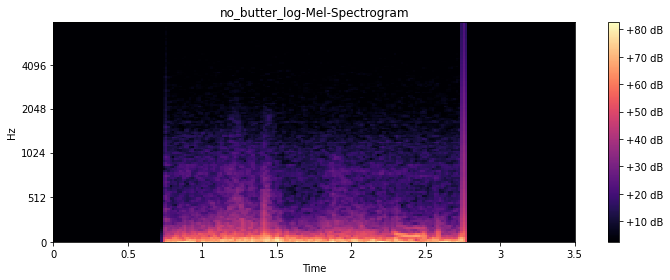

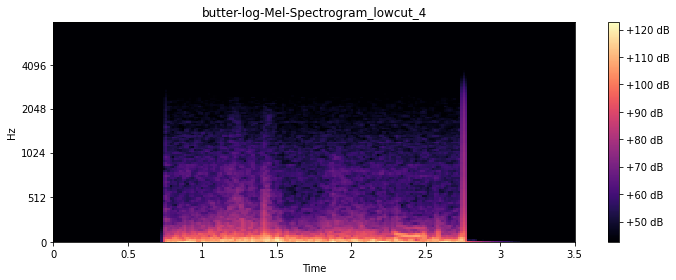

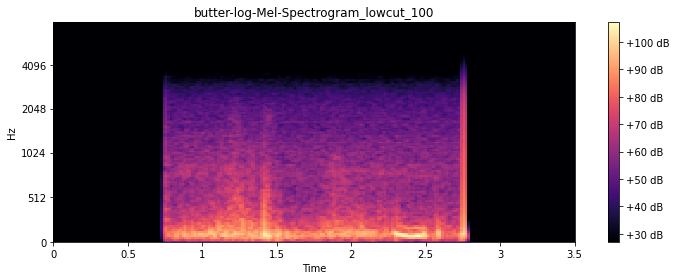

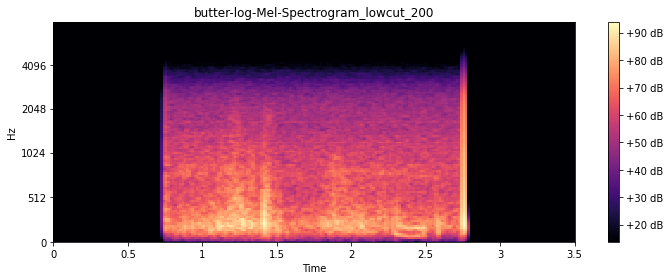

In [38]:
# Butter worth filter 적용전
mSpec_b=lb.feature.melspectrogram(y= audio, sr=sr)
log_mSpec_b = librosa.power_to_db(mSpec_b, ref=np.median)
plt.figure(figsize=(10, 4))
plt.title('no_butter_log-Mel-Spectrogram') 
librosa.display.specshow(log_mSpec_b, x_axis="time", y_axis="mel", hop_length=256, sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# low cut 4로 설정
butter_mSpec_4=lb.feature.melspectrogram(y= butter_1[1], sr=sr)
log_mSpec_butter_4 = librosa.power_to_db(butter_mSpec_4, ref=np.median)
plt.figure(figsize=(10, 4))
plt.title('butter-log-Mel-Spectrogram_lowcut_4') 
librosa.display.specshow(log_mSpec_butter_4, x_axis="time", y_axis="mel", hop_length=256, sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# low cut 100으로 설정
butter_mSpec_100=lb.feature.melspectrogram(y= butter_2[1], sr=sr)
log_mSpec_butter_100 = librosa.power_to_db(butter_mSpec_100, ref=np.median)
plt.figure(figsize=(10, 4))
plt.title('butter-log-Mel-Spectrogram_lowcut_100') 
librosa.display.specshow(log_mSpec_butter_100, x_axis="time", y_axis="mel", hop_length=256, sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# low cut 200으로 설정
butter_mSpec_200=lb.feature.melspectrogram(y= butter_3[1], sr=sr)
log_mSpec_butter_200 = librosa.power_to_db(butter_mSpec_200, ref=np.median)
plt.figure(figsize=(10, 4))
plt.title('butter-log-Mel-Spectrogram_lowcut_200') 
librosa.display.specshow(log_mSpec_butter_200, x_axis="time", y_axis="mel", hop_length=256, sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Low cut의 파라미터를 조정하여 결과를 확인하였을 때 음성과 멜스펙토그램에서 크게 차이는 없었으나 butter_worth filter을 적용 전과 후의 차이는 분명하였음.

### (2) 위의 파라미터값 Audio로 들어보기

In [42]:
from IPython.display import Audio

# no butter fillter
Audio(audio, rate = 16000)  


In [43]:
# Low cut 4
Audio(butter_1[1], rate = 16000)  

In [44]:
# Low cut 100
Audio(butter_2[1], rate = 16000)  

In [46]:
# Low cut 200
Audio(butter_3[1], rate = 16000) 